In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('reddit-university-data.csv')

In [5]:
df.head()

,id,university,title,content,comments,author,created_utc,score
0,1fylsog,harvard,"Register to vote by October 26th, and vote in ...","On November 5th, Massachusetts will vote not j...",[],EllieDai,2024-10-08 04:54:41,6
1,1g0gvaa,harvard,Has the Harvard Crimson ever retracted/apologi...,"This is a very specific question, and it obvio...",['College kids hold misguided views. More news...,Ouroboros963,2024-10-10 17:15:02,22
2,1g0dbjv,harvard,Harvard Alumnus Wins Chemistry Nobel,NaN,"['For contributors to AI?', ""I don't think he ...",ThrillSurgeon,2024-10-10 12:54:50,10
3,1g0k72t,harvard,Americans Victor Ambros of UMass Chan and Gary...,NaN,[],mlockerottinghaus,2024-10-10 20:02:25,1
4,1g09rjw,harvard,History of Science,History of science majors/those of you familia...,"[""I'm a graduate student so can't answer your ...",Pretzel2192,2024-10-10 08:52:19,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           800 non-null    object
 1   university   800 non-null    object
 2   title        800 non-null    object
 3   content      726 non-null    object
 4   comments     800 non-null    object
 5   author       800 non-null    object
 6   created_utc  800 non-null    object
 7   score        800 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.1+ KB


In [7]:
df = df.dropna(subset=['content'])

In [8]:
df = df[df['comments'].apply(lambda x: x != '[]')]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 1 to 798
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           608 non-null    object
 1   university   608 non-null    object
 2   title        608 non-null    object
 3   content      608 non-null    object
 4   comments     608 non-null    object
 5   author       608 non-null    object
 6   created_utc  608 non-null    object
 7   score        608 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 42.8+ KB


In [10]:
df.head()

,id,university,title,content,comments,author,created_utc,score
1,1g0gvaa,harvard,Has the Harvard Crimson ever retracted/apologi...,"This is a very specific question, and it obvio...",['College kids hold misguided views. More news...,Ouroboros963,2024-10-10 17:15:02,22
4,1g09rjw,harvard,History of Science,History of science majors/those of you familia...,"[""I'm a graduate student so can't answer your ...",Pretzel2192,2024-10-10 08:52:19,5
7,1g07l8g,harvard,Is this a Harvard startup?,I’ve been seeing a website called Shout! being...,['It seems to be a B.U. students startup:\n\n[...,Bitter-Air-8473,2024-10-10 06:53:32,0
8,1fzbmh1,harvard,Scenic Coastal/Lake Areas Near Harvard,My 25th reunion is coming up and I want to gat...,['Take the ferry from Boston harbor to Provinc...,wheelwatcher222,2024-10-09 03:19:35,7
9,1fzl93q,harvard,Historical Tour of Harvard,My family is coming to visit next month and I ...,['It was up and running as of a week or so ago...,Spare_Pay_2944,2024-10-09 12:09:23,1


In [39]:
df['university'].value_counts()

university
mit         86
harvard     80
nyu         78
stanford    76
uofm        75
berkeley    72
gatech      72
ucla        69
Name: count, dtype: int64

In [115]:
df['comments'] = df['comments'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [38]:
universities = list(df['university'].unique())

In [66]:
titles_dict = {}
for i, university in enumerate(universities):
    uni_titles = df[df['university'] == f'{university}']
    titles_dict[university] = list(uni_titles['title'].values)

In [72]:
content_dict = {}
for i, university in enumerate(universities):
    uni_titles = df[df['university'] == f'{university}']
    content_dict[university] = list(uni_titles['content'].values)

In [116]:
comments_dict = {}
for i, university in enumerate(universities):
    uni_comments = df[df['university'] == f'{university}']
    comments_dict[university] = list(uni_comments['comments'].values)

Using VADER(Valence Aware Dictionary and sEntiment Reasoner) for calculating sentiment from -1 to +1

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment = analyser.polarity_scores(text)
    return sentiment['compound'] #returns a score between -1 to +1

In [70]:
title_scores = {}
for uni, titles in titles_dict.items():
    total_score = 0
    for title in titles:
        total_score += get_vader_sentiment(title)
    score = total_score / len(titles)
    title_scores[uni] = score


In [71]:
title_scores

{'harvard': 0.04177374999999999,
 'mit': 0.07953023255813954,
 'stanford': 0.04635394736842105,
 'ucla': 0.06600724637681162,
 'berkeley': 0.055725,
 'uofm': 0.012305333333333337,
 'gatech': 0.028202777777777775,
 'nyu': 0.08945641025641027}

In [119]:
content_scores = {}
for uni, contents in content_dict.items():
    total_score = 0
    for content in contents:
        total_score += get_vader_sentiment(content)
    score = total_score / len(contents)
    content_scores[uni] = score

In [120]:
content_scores

{'harvard': 0.37349874999999993,
 'mit': 0.41421279069767447,
 'stanford': 0.325263157894737,
 'ucla': 0.13988115942028984,
 'berkeley': 0.23937222222222213,
 'uofm': 0.17559199999999994,
 'gatech': 0.2374124999999999,
 'nyu': 0.3155910256410256}

In [122]:
comments_scores = {}
for uni, comments in comments_dict.items():
    total_score = 0
    for comment_list in comments:
        post_score = 0
        for comment in comment_list:
            post_score += get_vader_sentiment(comment)
        post_score = post_score / len(comment_list)
        total_score += post_score
    score = total_score / len(comments)
    comments_scores[uni] = score


In [123]:
comments_scores

{'harvard': 0.2166858333333334,
 'mit': 0.3152023837209303,
 'stanford': 0.24181304824561403,
 'ucla': 0.17487961352657005,
 'berkeley': 0.21175458333333333,
 'uofm': 0.22418240000000003,
 'gatech': 0.27184400462962965,
 'nyu': 0.2515369871794872}

In [128]:
combined_dict = {key: title_scores[key] + content_scores[key] + comments_scores[key] for key in title_scores}

In [129]:
combined_dict

{'harvard': 0.6319583333333334,
 'mit': 0.8089454069767443,
 'stanford': 0.6134301535087721,
 'ucla': 0.3807680193236715,
 'berkeley': 0.5068518055555554,
 'uofm': 0.4120797333333333,
 'gatech': 0.5374592824074074,
 'nyu': 0.6565844230769231}

In [127]:
type(comments_dict['harvard'])

list

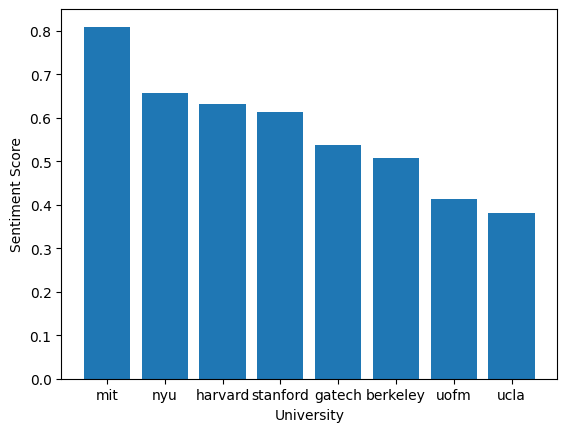

In [136]:
import matplotlib.pyplot as plt

sorted_dict = dict(sorted(combined_dict.items(), key=lambda item: item[1], reverse=True))
universities = list(sorted_dict.keys())
scores = list(sorted_dict.values())

plt.bar(universities, scores)
plt.xlabel('University')
plt.ylabel('Sentiment Score')
plt.show()